### *Import Libraries*

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

### *Reading the files*

In [2]:
train_data = pd.read_csv("Data/train.csv", index_col = None).drop("PassengerId", axis=1)
test_data = pd.read_csv("Data/test.csv", index_col = None).drop("PassengerId", axis=1)
gender_submission = pd.read_csv("Data/gender_submission.csv", index_col=None)

In [3]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### **New Thing Learnt. For my reference**

In [6]:
# Getting the entire data for cleaning up and wrangling
full_data = [train_data, test_data]

### *Removing columns that do not provide any useful information.*

In [7]:
new_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Survived']
for data in full_data:
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_data = train_data.reindex(columns=new_columns)
test_data = test_data.reindex(columns=new_columns.remove('Survived'))

In [8]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare,Survived
0,3,male,22.0,1,0,S,7.2500,0
1,1,female,38.0,1,0,C,71.2833,1
2,3,female,26.0,0,0,S,7.9250,1
3,1,female,35.0,1,0,S,53.1000,1
4,3,male,35.0,0,0,S,8.0500,0


In [9]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [10]:
for data in full_data:
    print(data.isnull().sum(), "\n\n")

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64 


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64 




**I was having problem dealing with the Age column because if I completely remove it, I might miss on some useful data and if I just take the median or average of all the non-null ages, then I don't think the calculated age would of a lot of importance because it will be of course inaccurate. So I decided to check on some codes on Kaggle.**

**For dealing with Age I will try finding the mean and std. Then I will take random values in this range and use them as the Age value for each missing value.**

### New thing learnt

### *Replacing the NaN age values with random numbers between   mean-std   and      mean+std*

In [11]:
mean_age_train = np.nanmean(train_data["Age"])
std_in_age_train= np.nanstd(train_data["Age"])
number_null_train = train_data["Age"].isna().sum()
rand_ages_train = np.random.randint(low=mean_age_train-std_in_age_train, high=mean_age_train+std_in_age_train, size=number_null_train)
age_slice_train = train_data.loc[:, "Age"]
age_slice_train.loc[age_slice_train.isna()] = rand_ages_train

c:\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
mean_age_test = np.nanmean(test_data["Age"])
std_of_age_test = np.nanstd(test_data["Age"])
number_null_test = test_data["Age"].isna().sum()
rand_ages_test = np.random.randint(mean_age_test-std_of_age_test, mean_age_test+std_of_age_test, size=number_null_test)
age_slice_test = test_data.loc[:, "Age"]
age_slice_test.loc[age_slice_test.isna()] = rand_ages_test

In [13]:
print("For training data:\n", train_data.isnull().sum())
print("\n\nFor testing data:\n", test_data.isnull().sum())

For training data:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
Fare        0
Survived    0
dtype: int64


For testing data:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


### *Using 0 and 1 for Sex column*

In [14]:
sex_slice_train = train_data.loc[:, "Sex"]
sex_slice_train.replace(["female", "male"], [0, 1], inplace=True)

sex_slice_test = test_data.loc[:, "Sex"]
sex_slice_test.replace(["male", "female"], [1, 0], inplace=True)

# 

### *Dealing with the Embarked column using one-hot encoding*

 I first get the dummy DataFrame for the Embarked column which contains three columns, one for each category (C, Q, S). Each column is a binary column showing whether the person boarded from that place or not. So for a particular example if we have:

#### C Q S
 0 1 0
 
This means the person boarded from Queenstown and so on...
Now under One-hot encoding and even logically, we don't need all the three columns for knowing, from where did the person got on the ship. We can get the same info with 2 columns as well. So, 

#### C Q
0 1

also means that the person embarked on the ship from Queenstown

# 

In [15]:
dummy_emb_train = pd.get_dummies(train_data["Embarked"]).iloc[:, :2]
dummy_emb_test = pd.get_dummies(test_data["Embarked"]).iloc[:, :2]

#### Combining the new dummy columns with the original DataFrames

In [16]:
merged_train_data = pd.concat([train_data, dummy_emb_train], axis=1)
merged_test_data = pd.concat([test_data, dummy_emb_test], axis=1)

#### Removing the Embarked column as it is not needed anymore

In [17]:
merged_train_data.drop('Embarked', axis=1, inplace=True)
merged_test_data.drop("Embarked", axis=1, inplace=True)

#### Rearranging the columns for ease of use

In [18]:
merged_train_data.columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Chebourg', 'Queenstown']
train_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Chebourg', 'Queenstown', 'Survived']
merged_train_data = merged_train_data.reindex(columns=train_cols)
train_data = merged_train_data.loc[:]

In [19]:
merged_test_data.columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Chebourg', 'Queenstown']
test_data = merged_test_data.loc[:]

In [20]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Chebourg,Queenstown,Survived
0,3,1,22.0,1,0,7.2500,0,0,0
1,1,0,38.0,1,0,71.2833,1,0,1
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,0


In [21]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Chebourg,Queenstown
0,3,1,34.5,0,0,7.8292,0,1
1,3,0,47.0,1,0,7.0000,0,0
2,2,1,62.0,0,0,9.6875,0,1
3,3,1,27.0,0,0,8.6625,0,0
4,3,0,22.0,1,1,12.2875,0,0


### Separating and analyzing the data based on sex

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

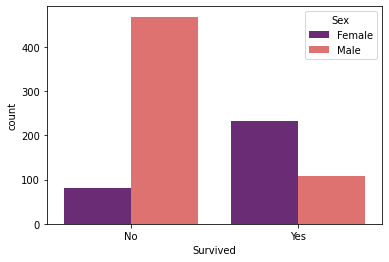

In [22]:
gender_surv_plt = sns.countplot(data=train_data, x="Survived", hue="Sex", palette="magma")
gender_surv_plt.legend(["Female", "Male"], title="Sex")
gender_surv_plt.set_xticklabels(["No", "Yes"])

In [23]:
# For females
female_data = train_data[train_data["Sex"]==0]
surv_pct_females = female_data["Survived"].loc[female_data["Survived"] == 1].sum()*100 / len(female_data)
print("Total number of females who were travelling: ", len(female_data))
print("Percentage of females who survived: ", surv_pct_females.round(4),"%")

# For males
male_data = train_data[train_data["Sex"]==1]
surv_pct_males = male_data["Survived"].loc[male_data["Survived"] == 1].sum()*100 / len(male_data)
print("Total number of males who were travelling: ", len(male_data))
print("Percentage of males who survived: ", surv_pct_males.round(4), "%")

print("\nClearly, even though a lot more males were travelling, a greater number(and percentage) of females were saved/rescued as compared to males.")

Total number of females who were travelling:  314
Percentage of females who survived:  74.2038 %
Total number of males who were travelling:  577
Percentage of males who survived:  18.8908 %

Clearly, even though a lot more males were travelling, a greater number(and percentage) of females were saved/rescued as compared to males.


### Analyzing the data on the basis of Passenger Class

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

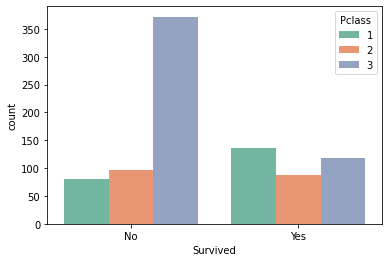

In [24]:
pclass_surv_plt = sns.countplot(data=train_data, x="Survived", hue="Pclass", palette="Set2")
pclass_surv_plt.set_xticklabels(["No", "Yes"])

In [25]:
class3_surv_pct = train_data["Pclass"].loc[(train_data["Pclass"]==3) & (train_data["Survived"]==1)].sum() * 100/len(train_data)
print(f"The plot shows that approximately {class3_surv_pct.round(4)}% of the people travelling in 3rd class survived.".format(class3_surv_pct))

The plot shows that approximately 40.0673% of the people travelling in 3rd class survived.


### Finding correlations in the data

There are no linear relationships in the data except a few fundamental ones like Fare and Pclass


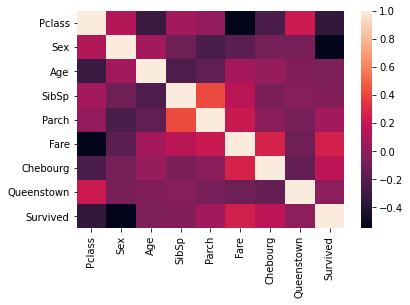

In [26]:
sns.heatmap(train_data.corr())
train_data.corr()
print("There are no linear relationships in the data except a few fundamental ones like Fare and Pclass")

#### Preparing the scalar and scaled data

In [27]:
scalar = preprocessing.StandardScaler()
scaled_train_data = scalar.fit_transform(train_data.iloc[:,:-1])
scaled_test_data = scalar.fit_transform(test_data)

#### Preparing the training and testing data for our model

In [28]:
X = scaled_train_data
y = train_data.iloc[:, -1]
X_test = scaled_test_data
y_test = np.array(gender_submission)[:,1]

#### Dealing with NaN value(s) in the Fare column in the testing data

In [29]:
fare_mean_test = np.nanmean(X_test, axis=0)
inds_nan_test = np.where(np.isnan(X_test))
X_test[inds_nan_test] = np.take(fare_mean_test, indices=inds_nan_test[1])

#### Preparing the model and fitting the data and predicting and evaluating our model

In [30]:
model = LogisticRegression()
model.fit(X, y)
print(model.score(X_test, y_test))
prediction = model.predict(X_test)

0.9425837320574163


In [33]:
df = pd.DataFrame(prediction, index=np.arange(892, 1310))
submission = df.to_csv(r'C:\Users\Kartikeya Sharma\OneDrive\Desktop\Kaggle\submission.csv')

In [34]:
df

,0
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
1308,0
